In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import format_axes
import numpy as np

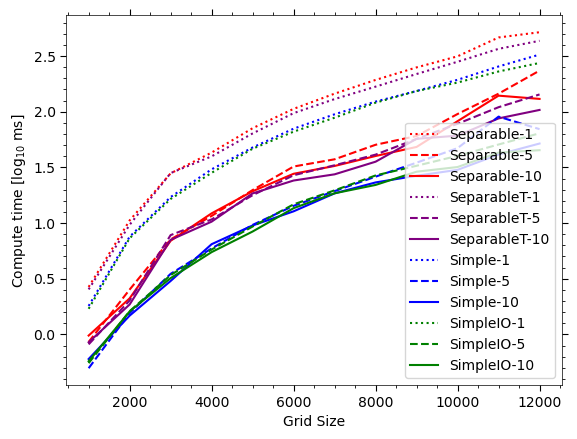

In [97]:
conv_df = pd.read_csv('convolutions.csv')
conv_df = conv_df.groupby(['method', 'num_threads', 'grid_size']).mean().reset_index()

fig, ax = plt.subplots()

conv_df['duration'] = np.log10(conv_df['duration'])

for method in conv_df['method'].unique():
    for num_threads in conv_df['num_threads'].unique():

        subset = conv_df[(conv_df['method'] == method) & (conv_df['num_threads'] == num_threads)]

        colors = {
            'simple_convolve': 'blue', 
            'separable_convolution': 'red',
            'separable_convolution_T': 'purple',
            'simple_inner_outer': 'green'
        }

        m = {
            'simple_convolve': 'Simple', 
            'separable_convolution': 'Separable',
            'separable_convolution_T': 'SeparableT',
            'simple_inner_outer': 'SimpleIO'
        }

        ls = {
            1: ':',
            5: '--',
            10: '-'
        }

        plt.plot(subset['grid_size'], subset['duration'], c=colors[method], label=f'{m[method]}-{num_threads}', ls=ls[num_threads])

plt.xlabel('Grid Size')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

plt.savefig('convolutions.png', bbox_inches='tight')

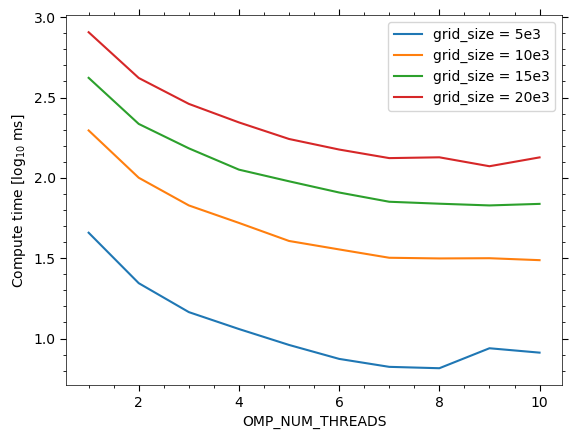

In [101]:
conv_df = pd.read_csv('simpleio_convolution.csv')
conv_df = conv_df.groupby(['method', 'num_threads', 'grid_size']).mean().reset_index()

fig, ax = plt.subplots()

conv_df['duration'] = np.log10(conv_df['duration'])

for grid_size in conv_df['grid_size'].unique():
    subset = conv_df[(conv_df['grid_size'] == grid_size)]

    plt.plot(subset['num_threads'], subset['duration'], label=rf'grid_size = {int(grid_size/1000)}e3')

plt.xlabel('OMP_NUM_THREADS')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

plt.savefig('simpleio.png', bbox_inches='tight')

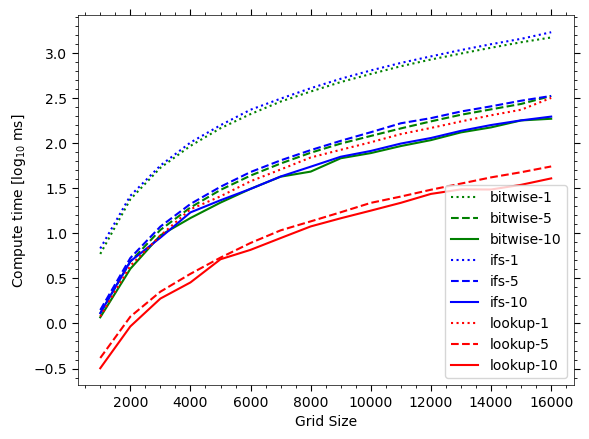

In [99]:
trans_df = pd.read_csv('transitions.csv')
trans_df = trans_df.groupby(['method', 'num_threads', 'grid_size']).mean().reset_index()

fig, ax = plt.subplots()

trans_df['duration'] = np.log10(trans_df['duration'])

for method in trans_df['method'].unique():
    for num_threads in trans_df['num_threads'].unique():

        subset = trans_df[(trans_df['method'] == method) & (trans_df['num_threads'] == num_threads)]

        colors = {
            'ifs': 'blue', 
            'lookup': 'red',
            'bitwise': 'green'
        }

        ls = {
            1: ':',
            5: '--',
            10: '-'
        }

        plt.plot(subset['grid_size'], subset['duration'], c=colors[method], label=f'{method}-{num_threads}', ls=ls[num_threads])

plt.xlabel('Grid Size')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

plt.savefig('transitions.png', bbox_inches='tight')

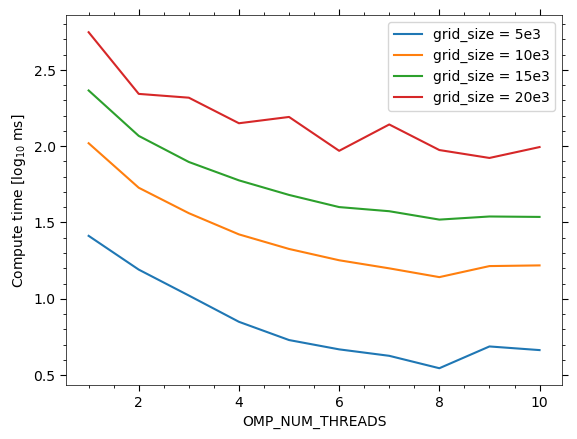

In [106]:
df = pd.read_csv('lookup.csv')
df = df.groupby(['method', 'num_threads', 'grid_size']).mean().reset_index()

fig, ax = plt.subplots()

df['duration'] = np.log10(df['duration'])

for grid_size in df['grid_size'].unique():
    subset = df[(df['grid_size'] == grid_size)]

    plt.plot(subset['num_threads'], subset['duration'], label=rf'grid_size = {int(grid_size/1000)}e3')

plt.xlabel('OMP_NUM_THREADS')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

plt.savefig('lookup.png', bbox_inches='tight')

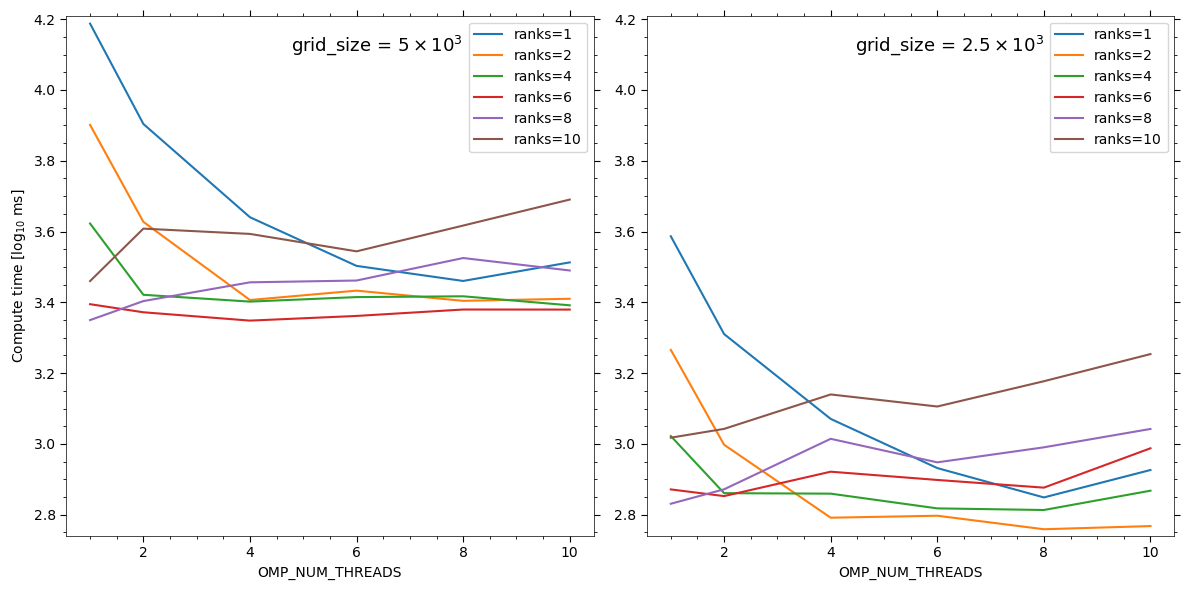

In [190]:
df = pd.read_csv('mpi_omp.csv', header=None)
df.columns = ['ranks', 'threads', 'grid_size', 'generations', 'duration']

df50 = df[df['grid_size'] == 5000].groupby(['ranks', 'threads', 'grid_size', 'generations']).mean().reset_index()
df25 = df[df['grid_size'] == 2500].groupby(['ranks', 'threads', 'grid_size', 'generations']).mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df50['duration'] = np.log10(df50['duration'])
df25['duration'] = np.log10(df25['duration'])


for ranks in df50['ranks'].unique():
    subset = df50[df50['ranks'] == ranks]
    ax1.plot(subset['threads'], subset['duration'], label=rf'ranks={ranks}')

for ranks in df25['ranks'].unique():
    subset = df25[df25['ranks'] == ranks]
    ax2.plot(subset['threads'], subset['duration'], label=rf'ranks={ranks}')

ax1.set_xlabel('OMP_NUM_THREADS')
ax2.set_xlabel('OMP_NUM_THREADS')
ax1.set_ylabel('Compute time [log$_{10}$ ms]')
ax1.legend()
ax2.legend()
format_axes(ax1)
format_axes(ax2)
plt.tight_layout()

ax1.set_ylim([2.74, 4.21])
ax2.set_ylim([2.74, 4.21])

ax1.text(8, 4.16, r"grid_size = $5 \times 10^{3}$", ha='right', va='top', color='black', fontsize=13)
ax2.text(8, 4.16, r"grid_size = $2.5 \times 10^{3}$", ha='right', va='top', color='black', fontsize=13)

plt.savefig('mpi_vs_omp_mac.png', bbox_inches='tight')